# Mike's Part

In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import display, HTML
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

#def cptr_rt(x, y):
#    url = 'https://pokeapi.co/api/v2/pokemon-species/'
#    id = range(x, (y + 1))
    # Getting data
#    cr = []
#    for id_ in id:
#        link = 'https://pokeapi.co/api/v2/pokemon-species/' + str(id_)
#        pages = requests.get(link)
#        if pages.reason == "Not Found":
#            link = 'https://pokeapi.co/api/v2/pokemon-species/' + str(id_) + '/'
#            pages = requests.get(link)
#            pages = pages.json()
#            if 'error' not in pages:
#                cr.append([pages['id'], pages['name'], pages['gender_rate'],
#                           pages['capture_rate'], pages['is_legendary'], pages['is_mythical']])
#        else:
#            pages = pages.json()
#            if 'error' not in pages:
#                cr.append([pages['id'], pages['name'], pages['gender_rate'],
#                           pages['capture_rate'], pages['is_legendary'], pages['is_mythical']])
    # Make the dataframe
#    cols = ['id', 'name', 'gender_rate', 'capture_rate', 'is_legendary', 'is_mythical']
#    df = pd.DataFrame(cr, columns = cols)
#    return df

#df = cptr_rt(1, 898)

#df

In [9]:
df = pd.read_csv('/Users/mike_stein612/Desktop/capture_rate_legendary_gender.csv')
df

,Unnamed: 0,id,name,gender_rate,capture_rate,is_legendary,is_mythical
0,0,1,bulbasaur,1,45,False,False
1,1,2,ivysaur,1,45,False,False
2,2,3,venusaur,1,45,False,False
3,3,4,charmander,1,45,False,False
4,4,5,charmeleon,1,45,False,False
...,...,...,...,...,...,...,...
893,893,894,regieleki,-1,3,True,False
894,894,895,regidrago,-1,3,True,False
895,895,896,glastrier,-1,3,True,False
896,896,897,spectrier,-1,3,True,False


In [10]:
df['is_legendary'] = df['is_legendary'].astype(int)
df['is_mythical'] = df['is_mythical'].astype(int)

pokemon = sm.add_constant(df)
pokemon = pokemon.drop(['id', 'name', 'gender_rate'], axis = 1)

pokemon.head()
est = sm.OLS(df.capture_rate, pokemon).fit()
est.summary() #moment of truth... are legendary pokemon actually harder to catch?!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           capture_rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.971e+31
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:31:33   Log-Likelihood:                 25324.
No. Observations:                 898   AIC:                        -5.064e+04
Df Residuals:                     893   BIC:                        -5.061e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.952e-14   1.16e-14      3.415      0.001    1.68e-14    6.22e-14
Unnamed: 0    -1.93e-17   1.79e-17     -1.076      0.282   -5.45e-17    1.59e-17
capture_rate     1.0000   6.36e-17   1.57e+16      0.000       1.000       1.000
is_legendary -1.288e-14   1.98e-14     -0.651      0.515   -5.17e-14    2.59e-14
is_mythical   3.819e-14   3.04e-14      1.256      0.209   -2.15e-14    9.79e-14
==============================================================================
Omnibus:                       95.367   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.315
Skew:                          -0.733   Prob(JB):                     3.31e-21
Kurtosis:                       2.391   Cond. No.                     3.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
kmeans = KMeans()
clusters = kmeans.fit(df['capture_rate'].values.reshape(-1, 1))

y = np.array(df['is_legendary'])
labels = np.zeros_like(clusters)
for i in range(5):
    mask = (clusters == i)
    labels[clusters == i] = mode(y[clusters == i])[0]
    
df['kmeans_tfidf'] = labels
df

,Unnamed: 0,id,name,gender_rate,capture_rate,is_legendary,is_mythical,kmeans_tfidf
0,0,1,bulbasaur,1,45,0,0,0
1,1,2,ivysaur,1,45,0,0,0
2,2,3,venusaur,1,45,0,0,0
3,3,4,charmander,1,45,0,0,0
4,4,5,charmeleon,1,45,0,0,0
...,...,...,...,...,...,...,...,...
893,893,894,regieleki,-1,3,1,0,0
894,894,895,regidrago,-1,3,1,0,0
895,895,896,glastrier,-1,3,1,0,0
896,896,897,spectrier,-1,3,1,0,0


In [12]:
fowlkes_mallows_score(df.kmeans_tfidf, y) #OMG legendary pokemon are still harder to catch!

0.9386035787346922

In [13]:
fig = px.scatter(df, x='gender_rate', y='capture_rate',
             hover_data=['name'], color='gender_rate', color_continuous_scale = 'sunset')
fig.show()#funsies... there is no major difference in catch rate between male and female pokemon

In [69]:
pkmn = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/pkmn.csv')
pkmn

,id,name,ability,ability_1,ability_2,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed,total,generation
0,1,bulbasaur,overgrow,chlorophyll,NaN,grass,poison,45,49,49,65,65,45,318,1
1,2,ivysaur,overgrow,chlorophyll,NaN,grass,poison,60,62,63,80,80,60,405,1
2,3,venusaur,overgrow,chlorophyll,NaN,grass,poison,80,82,83,100,100,80,525,1
3,4,charmander,blaze,solarpower,NaN,fire,NaN,39,52,43,60,50,65,309,1
4,5,charmeleon,blaze,solarpower,NaN,fire,NaN,58,64,58,80,65,80,405,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,regieleki,transistor,NaN,NaN,electric,NaN,80,100,50,100,50,200,580,8
894,895,regidrago,dragonsmaw,NaN,NaN,dragon,NaN,200,100,50,100,50,80,580,8
895,896,glastrier,chillingneigh,NaN,NaN,ice,NaN,100,145,130,65,110,30,580,8
896,897,spectrier,grimneigh,NaN,NaN,ghost,NaN,100,65,60,145,80,130,580,8


# Pams Part

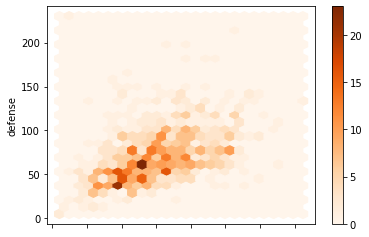

In [70]:
pkmn.plot.hexbin(x='attack',y='defense',gridsize=25,cmap='Oranges')

In [71]:
pkmn_3d = pkmn[['hp','attack','defense']]
pkmn_3d.iplot(kind='surface',colorscale='rdylbu')

In [73]:
pokemon = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/Pokemon_update.csv')
pokemon

pokemon.drop(columns = ['Unnamed: 0', 'id_x'], inplace=True)
pokemon.set_index(['name'],inplace=True)
pokemon.head()

wcss=[]

X=pokemon[['hp','base_experience']].values
print(X.shape)
y = pokemon['hp']

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

(872, 2)


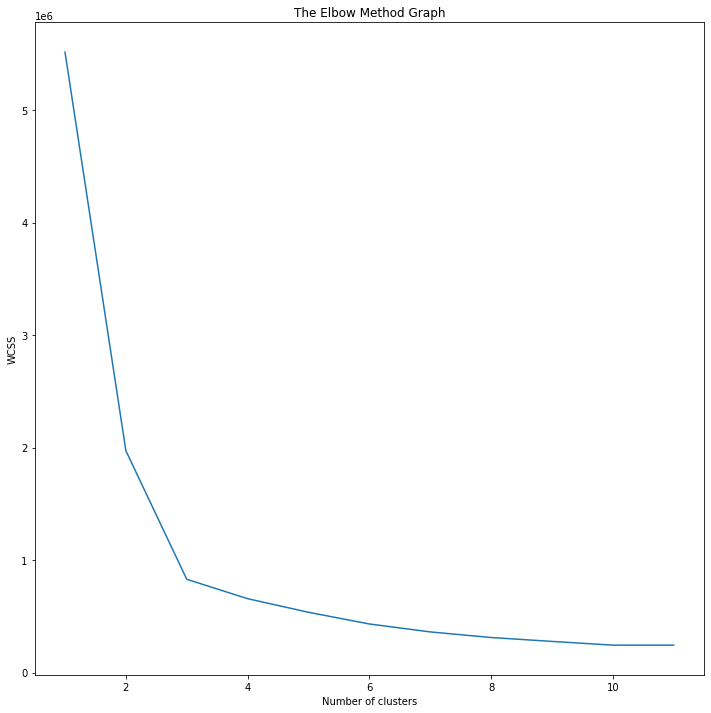

In [30]:
kmeans.fit(X)

wcss.append(kmeans.inertia_)

plt.subplots(figsize=(12, 12))
plt.plot(range(1,12),wcss.copy())
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans1 = kmeans.fit_predict(X)

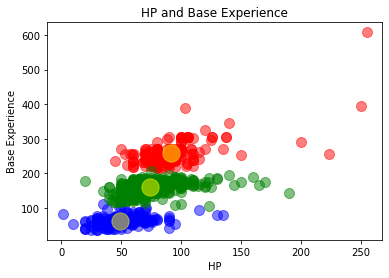

In [32]:
plt.scatter(X[y_kmeans1==0, 0], X[y_kmeans1==0, 1], s=100, c='red', label ='Cluster 1',alpha=0.5)
plt.scatter(X[y_kmeans1==1, 0], X[y_kmeans1==1, 1], s=100, c='blue', label ='Cluster 2',alpha=0.5)
plt.scatter(X[y_kmeans1==2, 0], X[y_kmeans1==2, 1], s=100, c='green', label ='Cluster 3',alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids',alpha=0.5)
plt.title('HP and Base Experience')
plt.xlabel('HP')
plt.ylabel('Base Experience')
plt.show()

In [34]:
X1=pokemon[['speed','base_experience']]
X1.shape

wcss1 =[]
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        
    kmeans.fit(X1)

    wcss1.append(kmeans.inertia_)

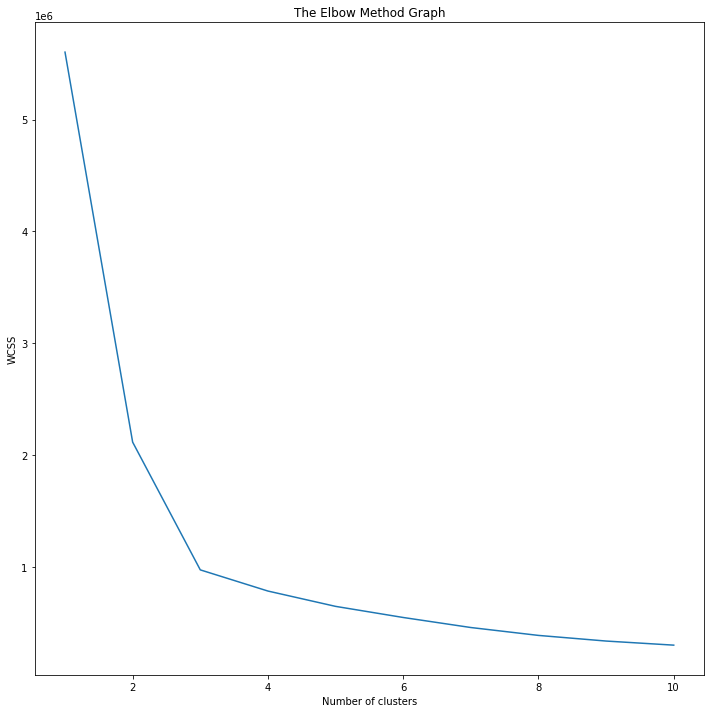

In [35]:
plt.subplots(figsize=(12, 12))
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

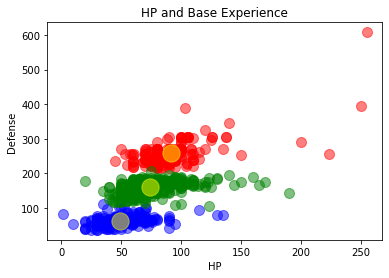

In [36]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans2 = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans2==0, 0], X[y_kmeans2==0, 1], s=100, c='red', label ='Cluster 1',alpha=0.5)
plt.scatter(X[y_kmeans2==1, 0], X[y_kmeans2==1, 1], s=100, c='blue', label ='Cluster 2',alpha=0.5)
plt.scatter(X[y_kmeans2==2, 0], X[y_kmeans2==2, 1], s=100, c='green', label ='Cluster 3',alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids',alpha=0.5)
plt.title('HP and Base Experience')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()

In [54]:
X2 = pokemon.drop(['type_1', 'type_2', 'flavor_text_entries', 'habitat'],axis=1)
y1 = pokemon['type_1']
X_train, X_test, y_train, y_test = train_test_split(X2, y1, test_size=0.15, random_state=42)
DTclassifier = DecisionTreeClassifier()

DTclassifier = DTclassifier.fit(X_train,y_train)
predictions = DTclassifier.predict(X_test)

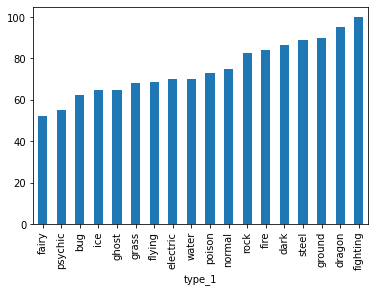

In [56]:
type_vs_attack = pokemon.groupby(['type_1'])['attack'].median().sort_values(ascending=True)
type_vs_attack.plot(kind='bar',y='attack points')

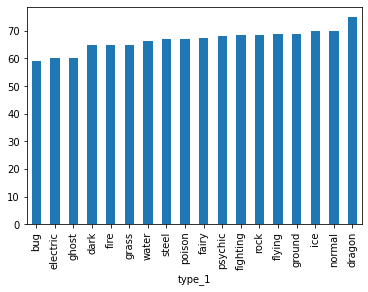

In [57]:
type_vs_hp = pokemon.groupby(['type_1'])['hp'].median().sort_values(ascending=True)
type_vs_hp.plot(kind='bar',y='hp points')

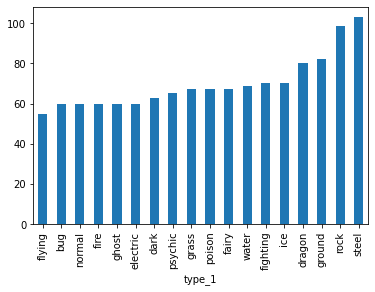

In [58]:
type_vs_defense = pokemon.groupby(['type_1'])['defense'].median().sort_values(ascending=True)
type_vs_defense.plot(kind='bar',y='defense points')

# Sakif's Part

In [59]:


x = pkmn[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total']]

kmeans = KMeans(4)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)

In [60]:
copy = pkmn.copy()
copy['clusters'] = clusters
copy

,ability,ability_1,ability_2,type_1,type_2,hp,attack,defense,special_attack,special_defense,speed,total,generation,clusters
name,,,,,,,,,,,,,,
bulbasaur,overgrow,chlorophyll,NaN,grass,poison,45,49,49,65,65,45,318,1,3
ivysaur,overgrow,chlorophyll,NaN,grass,poison,60,62,63,80,80,60,405,1,1
venusaur,overgrow,chlorophyll,NaN,grass,poison,80,82,83,100,100,80,525,1,2
charmander,blaze,solarpower,NaN,fire,NaN,39,52,43,60,50,65,309,1,3
charmeleon,blaze,solarpower,NaN,fire,NaN,58,64,58,80,65,80,405,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
regieleki,transistor,NaN,NaN,electric,NaN,80,100,50,100,50,200,580,8,0
regidrago,dragonsmaw,NaN,NaN,dragon,NaN,200,100,50,100,50,80,580,8,0
glastrier,chillingneigh,NaN,NaN,ice,NaN,100,145,130,65,110,30,580,8,0


In [64]:
copy.reset_index(level=0, inplace=True)

fig = px.scatter(copy, x='total', y='attack', hover_data=['name'], 
                 color='clusters', color_continuous_scale = 'sunset')


fig.show()

In [65]:
fig = px.scatter(copy, x='total', y='speed', hover_data=['name'], 
                 color='clusters', color_continuous_scale = 'sunset')


fig.show()

In [66]:
fig = px.scatter(copy, x='total', y='hp', hover_data=['name'], 
                 color='clusters', color_continuous_scale = 'sunset')


fig.show()

# Kalebs Part

In [17]:
poke1 = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/Master_poke.csv')
poke2 = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/pkmn.csv')

In [18]:
types_poke = poke2.copy()
types_poke = types_poke.drop(['hp','attack','defense','special_attack','special_defense','speed', 'total'],axis=1)

In [19]:
pokes_merge = pd.merge(poke1, types_poke, on='name', how='inner')

In [21]:
pokes_merge = pokes_merge.drop(['id_y','Unnamed: 0','ability','ability_1','ability_2'], axis=1)

In [23]:
#splitting the master df into gen 1-3 and gen 4-8
pkmn_merge1 = pokes_merge[0:385]
pkmn_merge2 = pokes_merge[385:898]

In [24]:
pkmn_merge2 = pkmn_merge2.drop(['habitat'], axis=1)

In [25]:
type_poke1 = pd.get_dummies(pkmn_merge1[['type_1', 'type_2']])
type_poke2 = pd.get_dummies(pkmn_merge2[['type_1', 'type_2']])

In [26]:
#Getting rid of a few random typing, just so that the 2 gen types are equal in length
type_poke2 = type_poke2.drop(['type_2_None','type_1_flying','type_2_normal'], axis=1)

In [27]:
X = type_poke1
y = pkmn_merge1['habitat']

model = LogisticRegression()

model.fit(X, y)
#Predicting habitat
model.predict(type_poke2)

array(['grassland', 'grassland', 'grassland', 'grassland', 'grassland',
       'grassland', 'waters-edge', 'waters-edge', 'waters-edge', 'forest',
       'forest', 'forest', 'grassland', 'grassland', 'forest', 'forest',
       'grassland', 'grassland', 'grassland', 'grassland', 'grassland',
       'mountain', 'mountain', 'mountain', 'mountain', 'forest', 'forest',
       'forest', 'forest', 'grassland', 'waters-edge', 'waters-edge',
       'grassland', 'grassland', 'waters-edge', 'waters-edge',
       'grassland', 'forest', 'forest', 'grassland', 'grassland', 'cave',
       'forest', 'grassland', 'grassland', 'urban', 'grassland',
       'grassland', 'rough-terrain', 'rough-terrain', 'mountain', 'urban',
       'grassland', 'forest', 'forest', 'waters-edge', 'waters-edge',
       'waters-edge', 'grassland', 'mountain', 'mountain',
       'rough-terrain', 'rough-terrain', 'grassland', 'grassland',
       'grassland', 'grassland', 'grassland', 'waters-edge',
       'waters-edge', 'sea', 

In [28]:
pkmn_merge2['habitat'] = model.predict(type_poke2)

In [29]:
pokemon_data = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/Pokemon_update.csv')

In [83]:
#Merging the datasets 
new_pokemon = pkmn_1.append([pkmn_2])

In [31]:
# Kmeans clustering
km = KMeans(n_clusters=3)
y_pred_poke = km.fit_predict(pokemon_data[['hp','attack','defense','special_attack','special_defense','speed', 
                                   'total','capture_rate','base_experience']])

In [32]:
pokemon_data['cluster'] = y_pred_poke

In [50]:
fig = px.scatter_3d(pokemon_data, x='total', y='base_experience', z='capture_rate',
                    color='cluster', hover_name='name',color_continuous_scale = 'sunset')
fig.show()

In [51]:
for C in list(pokemon_data.cluster.unique()):
    fig = px.scatter_3d(pokemon_data[pokemon_data.cluster == C], x='total', y='base_experience',z='capture_rate',color='habitat', symbol='cluster', hover_name='name',color_continuous_scale = 'sunset')
    fig.show()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pokemon_data[['hp','attack','defense','special_attack','special_defense','speed', 'total','capture_rate','base_experience']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_data = scaler.transform(pokemon_data[['hp','attack','defense','special_attack','special_defense','speed', 'total','capture_rate','base_experience']])

In [42]:
pca = PCA(n_components=3)

In [44]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
x_pca = pca.transform(scaled_data)

In [46]:
#Pokemon Habitats
px.scatter(x_pca, x=x_pca[:,0], y=x_pca[:,1],hover_name=pokemon_data['name'], color=pokemon_data['habitat'], height=400)

In [52]:
#Pokemon Capture rate
px.scatter(x_pca, x=x_pca[:,0], y=x_pca[:,1],hover_name=pokemon_data['name'], color=pokemon_data['capture_rate'],color_continuous_scale = 'sunset', height=400)

In [54]:
#Pokemon base_experience
px.scatter(x_pca, x=x_pca[:,0], y=x_pca[:,1],hover_name=pokemon_data['name'], color=pokemon_data['base_experience'], height=400)

In [55]:
#Pokemon clustered
px.scatter(x_pca, x=x_pca[:,0], y=x_pca[:,1],hover_name=pokemon_data['name'], color=pokemon_data['cluster'],color_continuous_scale = 'sunset', height=400)

# Annes Part


In [56]:
poke_flavors = pd.read_csv('/Users/kalebmckenzie/Downloads/Pokemon Project/Pokemon__flavors.csv')

In [57]:
poke_flavors = poke_flavors.rename({'flavor_text_entries':'flavor'}, axis=1)

In [58]:
#There's punctuation in there. To be sure I'm not missing anything,
#I'm running a full special character removal loop.

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    poke_flavors['flavor'] = poke_flavors['flavor'].str.replace(char, ' ')

#This loop can cause double white spaces, so now i'll remove them
poke_flavors['flavor'] = poke_flavors['flavor'].str.split().str.join(" ")

#Converting all text to lowercase 
poke_flavors['flavor'] = poke_flavors['flavor'].str.lower()

In [61]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
poke_flavors2 = poke_flavors.copy()

In [62]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
poke_flavors2['token_flavors'] = poke_flavors2['flavor'].apply(tokenizer.tokenize)
poke_flavors2['token_selftext'] = poke_flavors2['flavor'].apply(tokenizer.tokenize)

In [63]:
flavor_words = [word for tokens in poke_flavors2["token_flavors"] for word in tokens]
flavor_length = [len(flavor) for flavor in poke_flavors2['token_flavors']]

VOCAB = sorted(list(set(flavor_words)))
print(f'There are {len(flavor_words)} words in total in the Pokemon flavor description texts, with {len(VOCAB)} unique words.')
print(f"Max flavor text length is {max(flavor_length)} words.")

There are 9672 words in total in the Pokemon flavor description texts, with 2623 unique words.
Max flavor text length is 40 words.


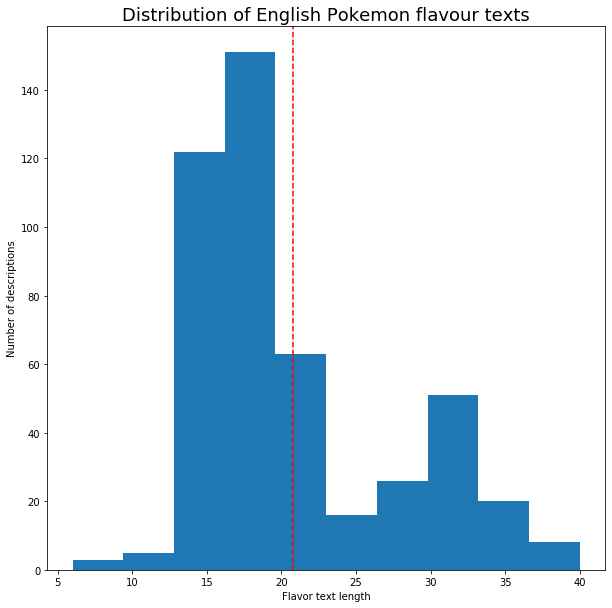

In [65]:
#Examining the length of English flavour texts: are they usually the same?
#
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Flavor text length')
plt.ylabel('Number of descriptions')
plt.hist(flavor_length)

mean = sum(flavor_length)/poke_flavors2.shape[0]
plt.axvline(mean, color='r', linestyle='--')
plt.title('Distribution of English Pokemon flavour texts', fontsize=18)
plt.show()

#Average length of Pokemon flavor description texts is 21 words
#There's a lot of variation depending on Pokemon types

In [66]:
#Once frequent demonstratives, pronouns et prepositions are removed,
#we are left with most common key words, which can give a good sense
#of how Pokemons are presented to players, which are their most important facets, etc.

#Let's see what this looks out.

#First, writing a loop to apply a stop_words to the text
#and also count all the key words in the Flavors column.

def get_top_n_words(corpus, n=None):
    cvec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [67]:
common_flavors = get_top_n_words(poke_flavors2['flavor'], 25)
for word, freq in common_flavors:
  print(word, freq)

pokémon 168
body 71
tail 33
said 31
people 30
prey 30
like 28
power 25
water 24
head 21
shell 19
wings 18
using 18
uses 17
long 16
live 15
make 14
hard 14
lives 14
food 14
powerful 14
foe 13
appears 13
small 13
strong 13


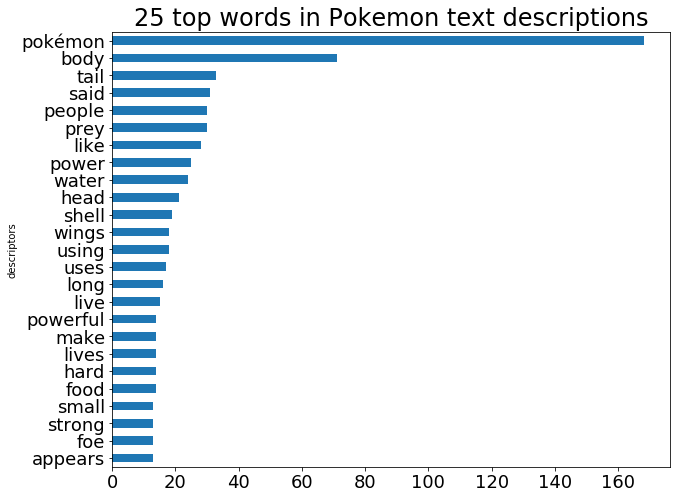

In [68]:
flavor_df = pd.DataFrame(common_flavors, columns=['descriptors', 'count'])
plt.figure(figsize=(10,8))
flavor_df.groupby('descriptors').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
plt.title("25 top words in Pokemon text descriptions", fontsize=24);

In [ ]:
"""Findings of the text analysis: POKEMON's ARE WAR MACHINES ABOVE ALL
* The pokemon's body is most frequently focused upon
* Pokemon's are presented in terms of their body's fighting ability (body, tail, shell, and wings, strong, power),
 rather than by their 'soft' appearance (ex: colour, eyes, friendly or fierce face, etc.) or <cuteness>.
* Notice the frequency of functional verbs such as "uses, using" and 'make.
* In the same vein, "power" related descriptors come up 3 times (power, powerful, strong)
  and as well, the notion of enemy ("prey", 'foe') twice.
*Notice also the standard storytelling markers of the descriptions: "people, said,
appears", which match the sense of mystery that the descriptions often try to impart."""